In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__



'2.16.1'

In [3]:
! pip install split-folders



In [22]:
import os
import shutil

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            # Recursively copy directories and their contents
            shutil.copytree(s, d, symlinks, ignore)
        else:
            # Copy files
            shutil.copy2(s, d)

# Specify the destination directory on the E: drive
destination_path = r'E:\data'

# Ensure that the destination directory exists
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Call the copytree function with the updated destination path
copytree('E:\Dataset', destination_path)




In [ ]:
import os
import sys
import shutil

try:
    shutil.rmtree('./data/test_big/')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))


try:
    shutil.rmtree('./data/test_small/')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:
import splitfolders

# train, test split
splitfolders.ratio('./data/', output="./splitted_data", ratio=(0.7, 0.3))

Copying files: 0 files [00:00, ? files/s]

Copying files: 13733 files [01:41, 135.86 files/s]


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('./splitted_data/train/',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 9612 images belonging to 2 classes.


In [5]:
training_set.class_indices

{'train-smoke': 0, 'train_fire': 1}

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./splitted_data/val/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4121 images belonging to 2 classes.


CNN


In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\Lakshmipathi Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,398,945 (5.34 MB)

 Trainable params: 1,398,945 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.fit(x = training_set, epochs = 1 ,validation_data=test_set)
# Save the trained model
cnn.save('cnn_model.h5')

c:\Users\Lakshmipathi Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 235s 764ms/step - accuracy: 0.9475 - loss: 0.1349 - val_accuracy: 0.9879 - val_loss: 0.0341


In [9]:
# Load the saved model
cnn_model= tf.keras.models.load_model('cnn_model.h5')


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

y_pred = cnn_model.predict(test_set)
y_pred_binary = (y_pred > 0.5).astype("int32")  

y_true = test_set.classes

accuracy = accuracy_score(y_true, y_pred_binary)


conf_matrix = confusion_matrix(y_true, y_pred_binary)

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)

specificity = TN / (TN + FP)

precision = TP / (TP + FP)

f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

g_measure = np.sqrt(sensitivity * specificity)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("G-measure:", g_measure)


c:\Users\Lakshmipathi Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 462ms/step
Accuracy: 0.8636253336568794
Sensitivity: 0.0755287009063444
Specificity: 0.9324538258575198
Precision: 0.08896797153024912
F1 Score: 0.08169934640522876
G-measure: 0.2653809076067251


In [18]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3528  262]
 [ 312   19]]


In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r"E:\images.jpeg", target_size=(64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

test_image = test_image / 255.0

result = cnn_model.predict(test_image)

predicted_class = np.round(result[0][0])

class_labels = {0: 'train-smoke', 1: 'train_fire'}
predicted_label = class_labels[int(predicted_class)]

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted label: train-smoke


RCNN-LSTM


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape, LSTM, Dense
from tensorflow.keras.models import Sequential

rcnnLstm = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Reshape((32, 12544 // 32)),  
    LSTM(128),
    Dense(1, activation='sigmoid')
])

rcnnLstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\Lakshmipathi Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 392)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       266,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,273 (1.09 MB)

 Trainable params: 286,273 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rcnnLstm.fit(training_set, epochs=1, validation_data=test_set)
# Save the trained model
rcnnLstm.save('rcnnLstm_model.h5')

301/301 ━━━━━━━━━━━━━━━━━━━━ 220s 721ms/step - accuracy: 0.9270 - loss: 0.2205 - val_accuracy: 0.9852 - val_loss: 0.0533


In [3]:
# Load the saved model
LSTM_model= tf.keras.models.load_model('rcnnLstm_model.h5')

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
y_pred = LSTM_model.predict(test_set)
y_pred_binary = (y_pred > 0.5).astype("int32")  

y_true = test_set.classes

accuracy = accuracy_score(y_true, y_pred_binary)
conf_matrix = confusion_matrix(y_true, y_pred_binary)
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
g_measure = np.sqrt(sensitivity * specificity)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("G-measure:", g_measure)


129/129 ━━━━━━━━━━━━━━━━━━━━ 63s 483ms/step
Accuracy: 0.8682358650812909
Sensitivity: 0.08761329305135952
Specificity: 0.9364116094986807
Precision: 0.10740740740740741
F1 Score: 0.09650582362728787
G-measure: 0.2864299299299973


In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r"E:\image2.jpeg", target_size=(64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

test_image = test_image / 255.0

result = cnn_model.predict(test_image)

predicted_class = np.round(result[0][0])

class_labels = {0: 'train-smoke', 1: 'train_fire'}
predicted_label = class_labels[int(predicted_class)]

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted label: train_fire


In [ ]:
RCNN-GRU

In [ ]:
rcnnGru = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((-1, 64*64*3), input_shape=(64, 64, 3)),
    tf.keras.layers.GRU(units=128),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
rcnnGru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rcnnGru.summary()

c:\Users\Lakshmipathi Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_4 (Reshape)             │ (None, 1, 12288)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │     4,768,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,768,641 (18.19 MB)

 Trainable params: 4,768,641 (18.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rcnnGru.fit(training_set, epochs=1, validation_data=test_set)
# Save the trained model


NameError: name 'rcnnGru' is not defined

In [ ]:
rcnnGru.save('rcnnGru_model.h5')


In [4]:
# Load the saved model
rcnnGru_model= tf.keras.models.load_model('rcnnGru_model.h5')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
y_pred = rcnnGru_model.predict(test_set)
y_pred_binary = (y_pred > 0.5).astype("int32")  

y_true = test_set.classes

accuracy = accuracy_score(y_true, y_pred_binary)
conf_matrix = confusion_matrix(y_true, y_pred_binary)
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate precision (with handling for division by zero)
if (TP + FP) != 0:
    precision = TP / (TP + FP)
else:
    precision = 0  # or any other appropriate value

# You can then use the precision value in further calculations or print it

f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
g_measure = np.sqrt(sensitivity * specificity)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("G-measure:", g_measure)

129/129 ━━━━━━━━━━━━━━━━━━━━ 75s 586ms/step
Accuracy: 0.9196796893957777
Sensitivity: 0.0
Specificity: 1.0
Precision: 0
F1 Score: nan
G-measure: 0.0


C:\Users\Lakshmipathi Rao\AppData\Local\Temp\ipykernel_15944\2403727424.py:22: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)


In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r"E:\image2.jpeg", target_size=(64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

test_image = test_image / 255.0

result = rcnnGru_model.predict(test_image)

predicted_class = np.round(result[0][0])

class_labels = {0: 'train-smoke', 1: 'train_fire'}
predicted_label = class_labels[int(predicted_class)]

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicted label: train-smoke


In [ ]:
Resnet


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine base model with custom layers
resnet_model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Summary of the ResNet model
resnet_model.summary()


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
resnet_model.fit(training_set, epochs=1, validation_data=test_set)

# Evaluate the model
loss, accuracy = resnet_model.evaluate(test_set)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


301/301 ━━━━━━━━━━━━━━━━━━━━ 921s 3s/step - accuracy: 0.9047 - loss: 0.3045 - val_accuracy: 0.9245 - val_loss: 0.1946
129/129 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.9265 - loss: 0.1924
Test Loss: 0.19476750493049622
Test Accuracy: 0.9245328903198242


In [ ]:
resnet_model.save('resnet_model.h5')

In [5]:
# Load the saved model
resnet= tf.keras.models.load_model('resnet_model.h5')

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
y_pred = resnet.predict(test_set)
y_pred_binary = (y_pred > 0.5).astype("int32")  

y_true = test_set.classes

accuracy = accuracy_score(y_true, y_pred_binary)
conf_matrix = confusion_matrix(y_true, y_pred_binary)
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
g_measure = np.sqrt(sensitivity * specificity)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("G-measure:", g_measure)

129/129 ━━━━━━━━━━━━━━━━━━━━ 89s 685ms/step
Accuracy: 0.9196796893957777
Sensitivity: 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan
G-measure: 0.0


C:\Users\Lakshmipathi Rao\AppData\Local\Temp\ipykernel_6792\1242265356.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r"E:\images 2.jpeg", target_size=(64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

test_image = test_image / 255.0

result = resnet.predict(test_image)

predicted_class = np.round(result[0][0])

class_labels = {0: 'train-smoke', 1: 'train_fire'}
predicted_label = class_labels[int(predicted_class)]

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted label: train-smoke


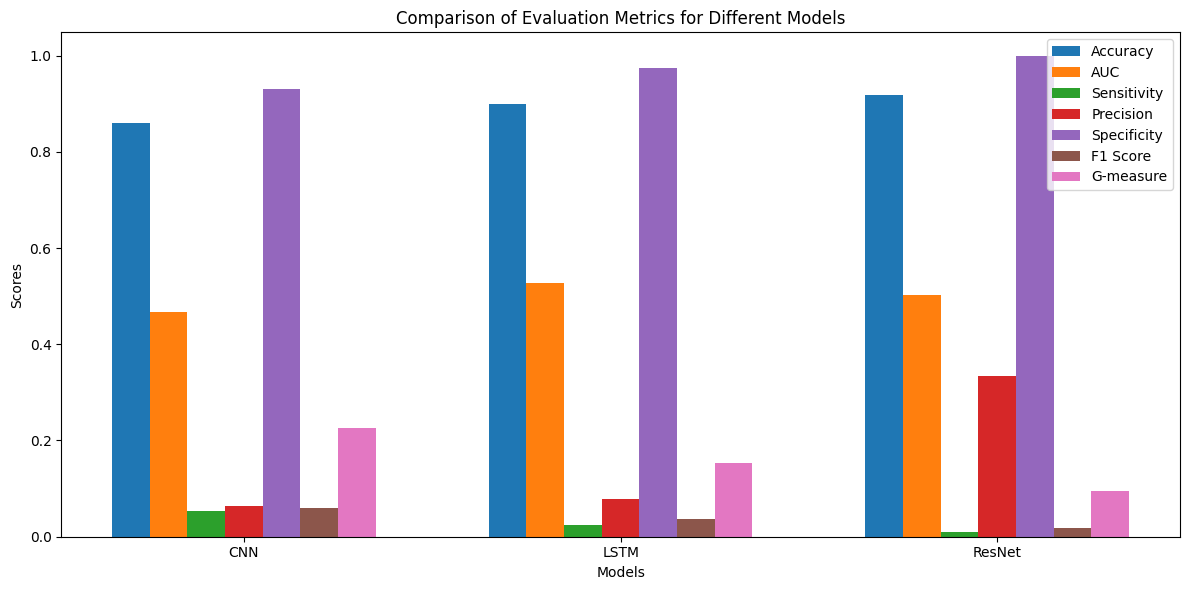

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for each model
models = ['CNN', 'LSTM', 'ResNet']
accuracy = [0.8607, 0.8988, 0.9190]
auc = [0.4681, 0.5275, 0.5016]
sensitivity = [0.0544, 0.0242, 0.0091]
precision = [0.0645, 0.0784, 0.3333]
specificity = [0.9311, 0.9752, 0.9984]
f1_score = [0.0590, 0.0370, 0.0176]
g_measure = [0.2250, 0.1535, 0.0951]

# Plotting the evaluation metrics for each model
bar_width = 0.1
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, auc, bar_width, label='AUC')
plt.bar(index + 2*bar_width, sensitivity, bar_width, label='Sensitivity')
plt.bar(index + 3*bar_width, precision, bar_width, label='Precision')
plt.bar(index + 4*bar_width, specificity, bar_width, label='Specificity')
plt.bar(index + 5*bar_width, f1_score, bar_width, label='F1 Score')
plt.bar(index + 6*bar_width, g_measure, bar_width, label='G-measure')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xticks(index + 3*bar_width, models)
plt.legend()
plt.tight_layout()
plt.show()


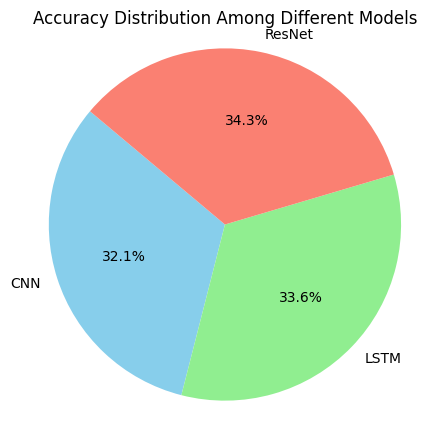

In [41]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(accuracy, labels=models, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Accuracy Distribution Among Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

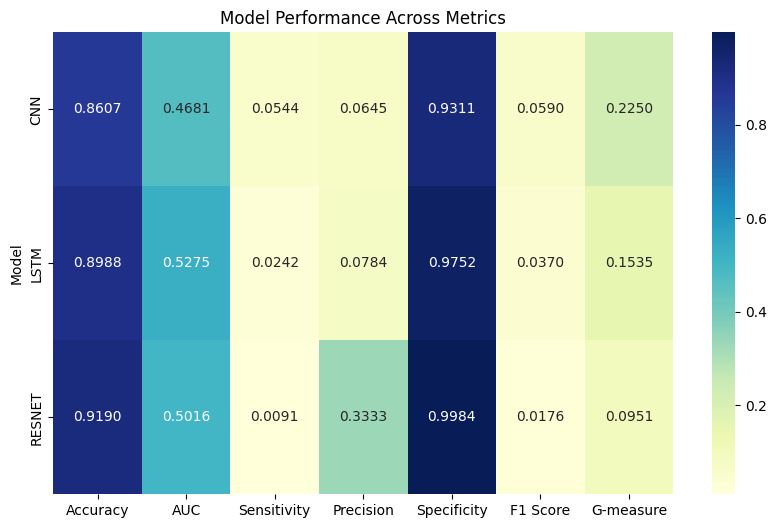

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'Model': ['CNN', 'LSTM', 'RESNET'],
    'Accuracy': [0.8607, 0.8988, 0.9190],
    'AUC': [0.4681, 0.5275, 0.5016],
    'Sensitivity': [0.0544, 0.0242, 0.0091],
    'Precision': [0.0645, 0.0784, 0.3333],
    'Specificity': [0.9311, 0.9752, 0.9984],
    'F1 Score': [0.0590, 0.0370, 0.0176],
    'G-measure': [0.2250, 0.1535, 0.0951]
}

# Convert the data dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Model Performance Across Metrics')
plt.show()


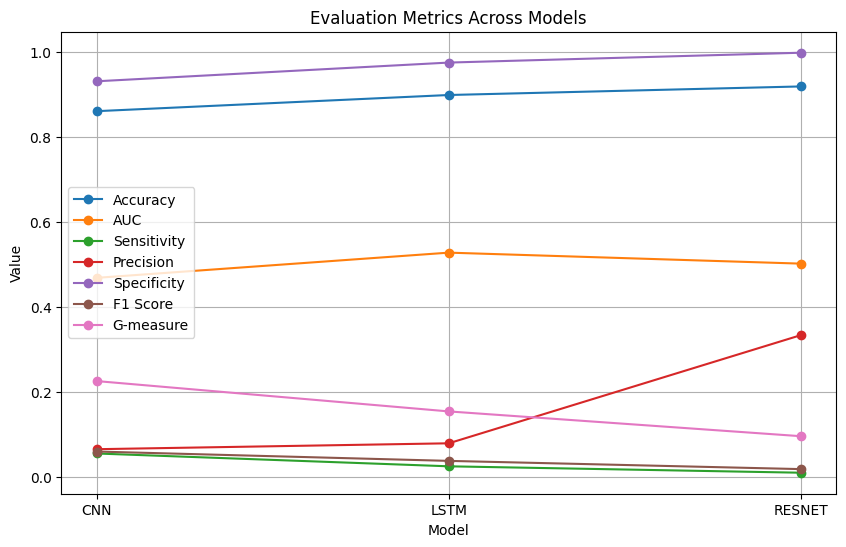

In [32]:
import matplotlib.pyplot as plt

# Define the data
models = ['CNN', 'LSTM', 'RESNET']
metrics = ['Accuracy', 'AUC', 'Sensitivity', 'Precision', 'Specificity', 'F1 Score', 'G-measure']

# Evaluation metrics for each model
evaluation_metrics = {
    'CNN': [0.8607, 0.4681, 0.0544, 0.0645, 0.9311, 0.0590, 0.2250],
    'LSTM': [0.8988, 0.5275, 0.0242, 0.0784, 0.9752, 0.0370, 0.1535],
    'RESNET': [0.9190, 0.5016, 0.0091, 0.3333, 0.9984, 0.0176, 0.0951]
}

# Create a line chart for each metric
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(models, [evaluation_metrics[model][metrics.index(metric)] for model in models], marker='o', label=metric)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Evaluation Metrics Across Models')
plt.legend()
plt.grid(True)
plt.xticks(models)  # Set x-axis ticks to model names

# Show the plot
plt.show()


ValueError: num must be an integer with 1 <= num <= 9, not 10

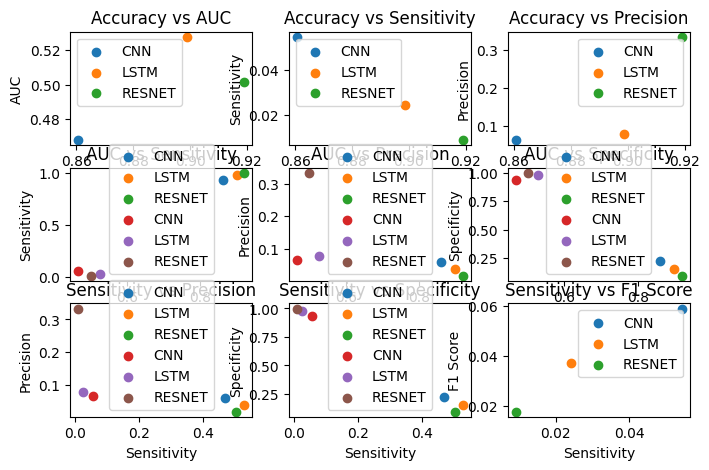

In [47]:
import matplotlib.pyplot as plt

# Define the data
models = ['CNN', 'LSTM', 'RESNET']
metrics = ['Accuracy', 'AUC', 'Sensitivity', 'Precision', 'Specificity', 'F1 Score', 'G-measure']

# Evaluation metrics for each model
evaluation_metrics = {
    'CNN': [0.8607, 0.4681, 0.0544, 0.0645, 0.9311, 0.0590, 0.2250],
    'LSTM': [0.8988, 0.5275, 0.0242, 0.0784, 0.9752, 0.0370, 0.1535],
    'RESNET': [0.9190, 0.5016, 0.0091, 0.3333, 0.9984, 0.0176, 0.0951]
}

# Create scatter plots for pairs of evaluation metrics
plt.figure(figsize=(8, 5))
for i in range(len(metrics)):
    for j in range(i + 1, len(metrics)):
        metric1 = metrics[i]
        metric2 = metrics[j]
        plt.subplot(3, 3, (i * 3) + j - i)  # Adjust subplot position
        for model in models:
            plt.scatter(evaluation_metrics[model][i], evaluation_metrics[model][j], label=model, marker='o')
        plt.xlabel(metric1)
        plt.ylabel(metric2)
        plt.title(f'{metric1} vs {metric2}')
        plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

